### Created BY: MARK JOSH N. ALVEAR
#### 3CSE
#### TO BE SUBMITTED:

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [220]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For statistical tests and models
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For machine learning models and evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Ignore warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_theme()


#### P.S: I used DeepSeek and o1 AI on this Notebook

# EDA
### Data Loading and Initial Exploration

In [222]:
# Load the dataset
df = pd.read_csv('boston.csv')  # Replace with your actual file path if different

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Check the dimensions of the dataset
print(f"\nDataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Statistical summary
print("\nStatistical summary of the dataset:")
print(df.describe())

First 5 rows of the dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Dataset has 506 rows and 14 columns.

Missing values in each column:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Statistical summary of the dataset:
             CRIM         

#### >Seems like the data is pretty clea. There are also no Null Values which is a pretty good start.


## Visualizing Histograms of Features Before Transformation



Histograms of selected features before transformation:


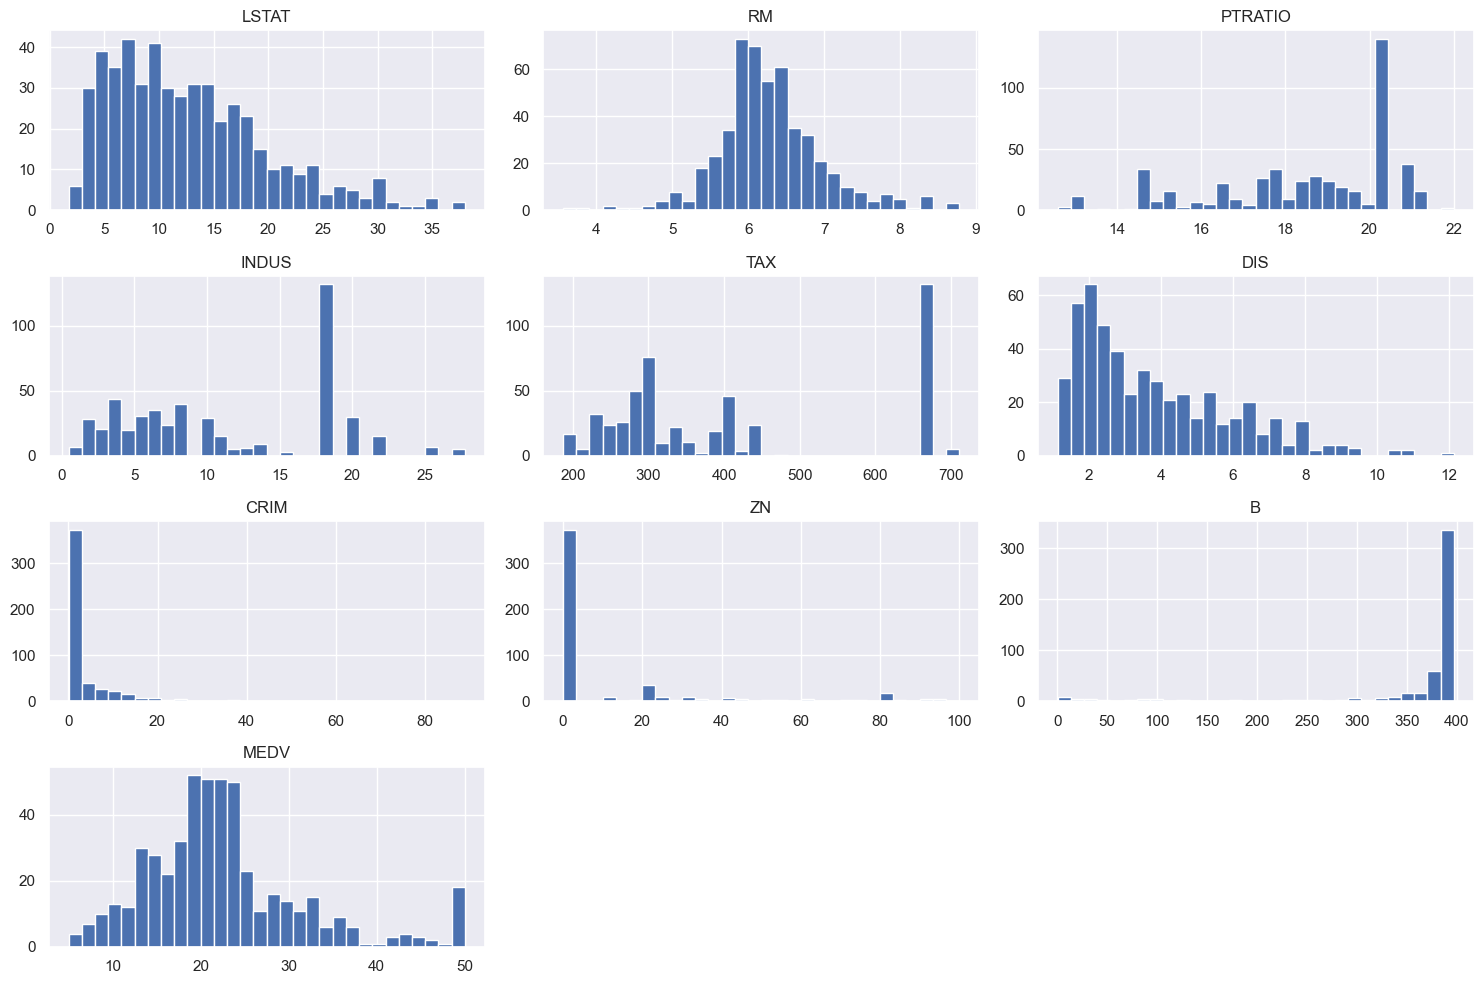

In [224]:
# List of selected features including the target variable MEDV
selected_features = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'DIS', 'CRIM', 'ZN', 'B', 'MEDV']

# Plot histograms of selected features before transformation
print("\nHistograms of selected features before transformation:")

df[selected_features].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

## Examining the Correlation Matrix

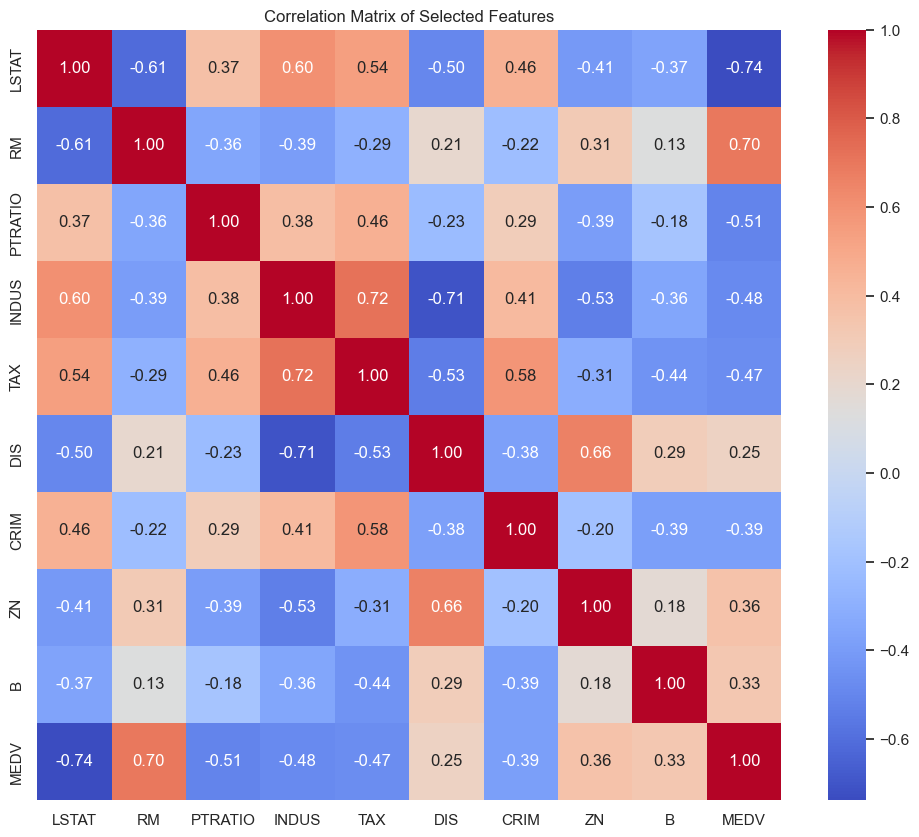

In [226]:
# Compute the correlation matrix of selected features including MEDV
corr_matrix = df[selected_features].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Selected Features')
plt.show()

The heatmap shows the correlation coefficients between pairs of variables.
High correlation coefficients (positive or negative) indicate a strong linear relationship between variables.
Multicollinearity can be identified by looking for pairs of independent variables with high correlation coefficients.

In [230]:
#Feature Selection:
# Define features and target variable
X = df[selected_features[:-1]]
y = df['MEDV']

# Data Transformation

##### #1. Transformed Skewed Features



Skewness of selected features before transformation:
LSTAT      0.906460
RM         0.403612
PTRATIO   -0.802325
INDUS      0.295022
TAX        0.669956
DIS        1.011781
CRIM       5.223149
ZN         2.225666
B         -2.890374
dtype: float64


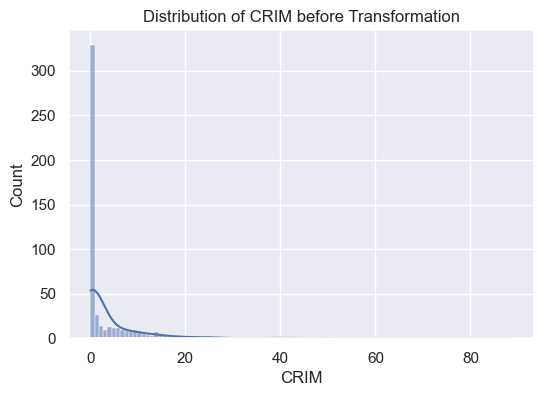

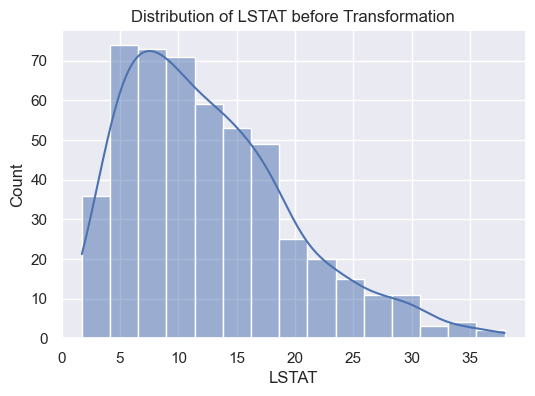

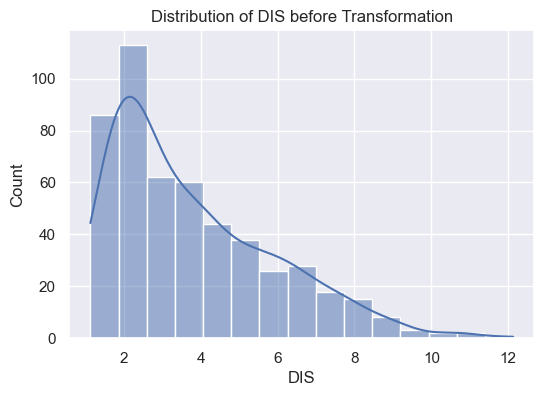

CRIM was log-transformed.
LSTAT was log-transformed.
DIS was log-transformed.


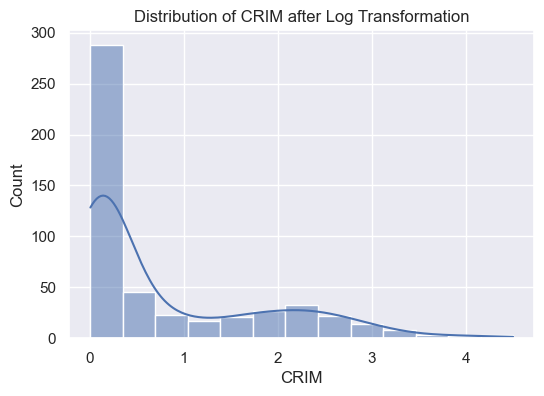

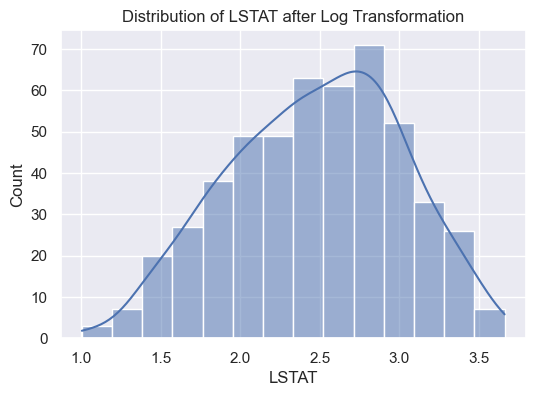

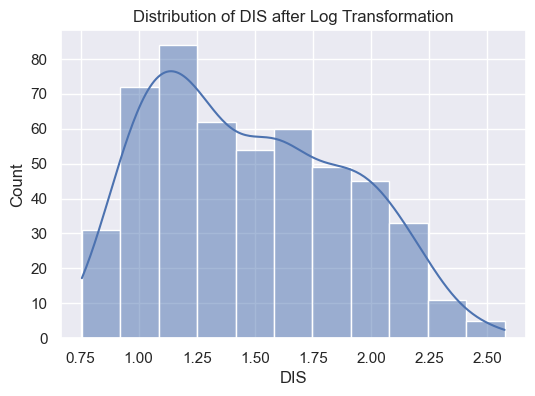


Skewness of selected features after transformation:
LSTAT     -0.187195
RM         0.403612
PTRATIO   -0.802325
INDUS      0.295022
TAX        0.669956
DIS        0.331561
CRIM       1.269201
ZN         2.225666
B         -2.890374
dtype: float64


In [233]:
# Check skewness of selected features before transformation
print("\nSkewness of selected features before transformation:")
skewness = X.skew()
print(skewness)

# List of features to log-transform based on skewness
features_to_transform = ['CRIM', 'LSTAT', 'DIS']

# Plot histograms before transformation
for feature in features_to_transform:
    plt.figure(figsize=(6, 4))
    sns.histplot(X[feature], kde=True)
    plt.title(f'Distribution of {feature} before Transformation')
    plt.xlabel(feature)
    plt.show()

# Apply log transformation to skewed features
for feature in features_to_transform:
    X[feature] = np.log1p(X[feature])
    print(f"{feature} was log-transformed.")

# Plot histograms after transformation
for feature in features_to_transform:
    plt.figure(figsize=(6, 4))
    sns.histplot(X[feature], kde=True)
    plt.title(f'Distribution of {feature} after Log Transformation')
    plt.xlabel(feature)
    plt.show()

# Recheck skewness after transformation
print("\nSkewness of selected features after transformation:")
skewness = X.skew()
print(skewness)

##### Apply Log Transformation to Target Variables

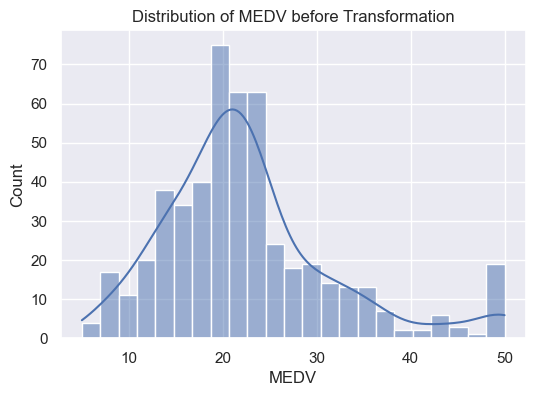

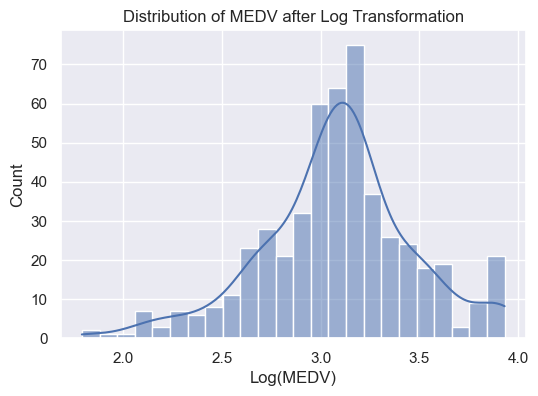

In [281]:
# Plot the distribution of MEDV before transformation
plt.figure(figsize=(6, 4))
sns.histplot(y, kde=True)
plt.title('Distribution of MEDV before Transformation')
plt.xlabel('MEDV')
plt.show()

# Apply log transformation to MEDV
y_log = np.log1p(y)

# Plot the distribution of MEDV after transformation
plt.figure(figsize=(6, 4))
sns.histplot(y_log, kde=True)
plt.title('Distribution of MEDV after Log Transformation')
plt.xlabel('Log(MEDV)')
plt.show()


Histograms of selected features after transformation:


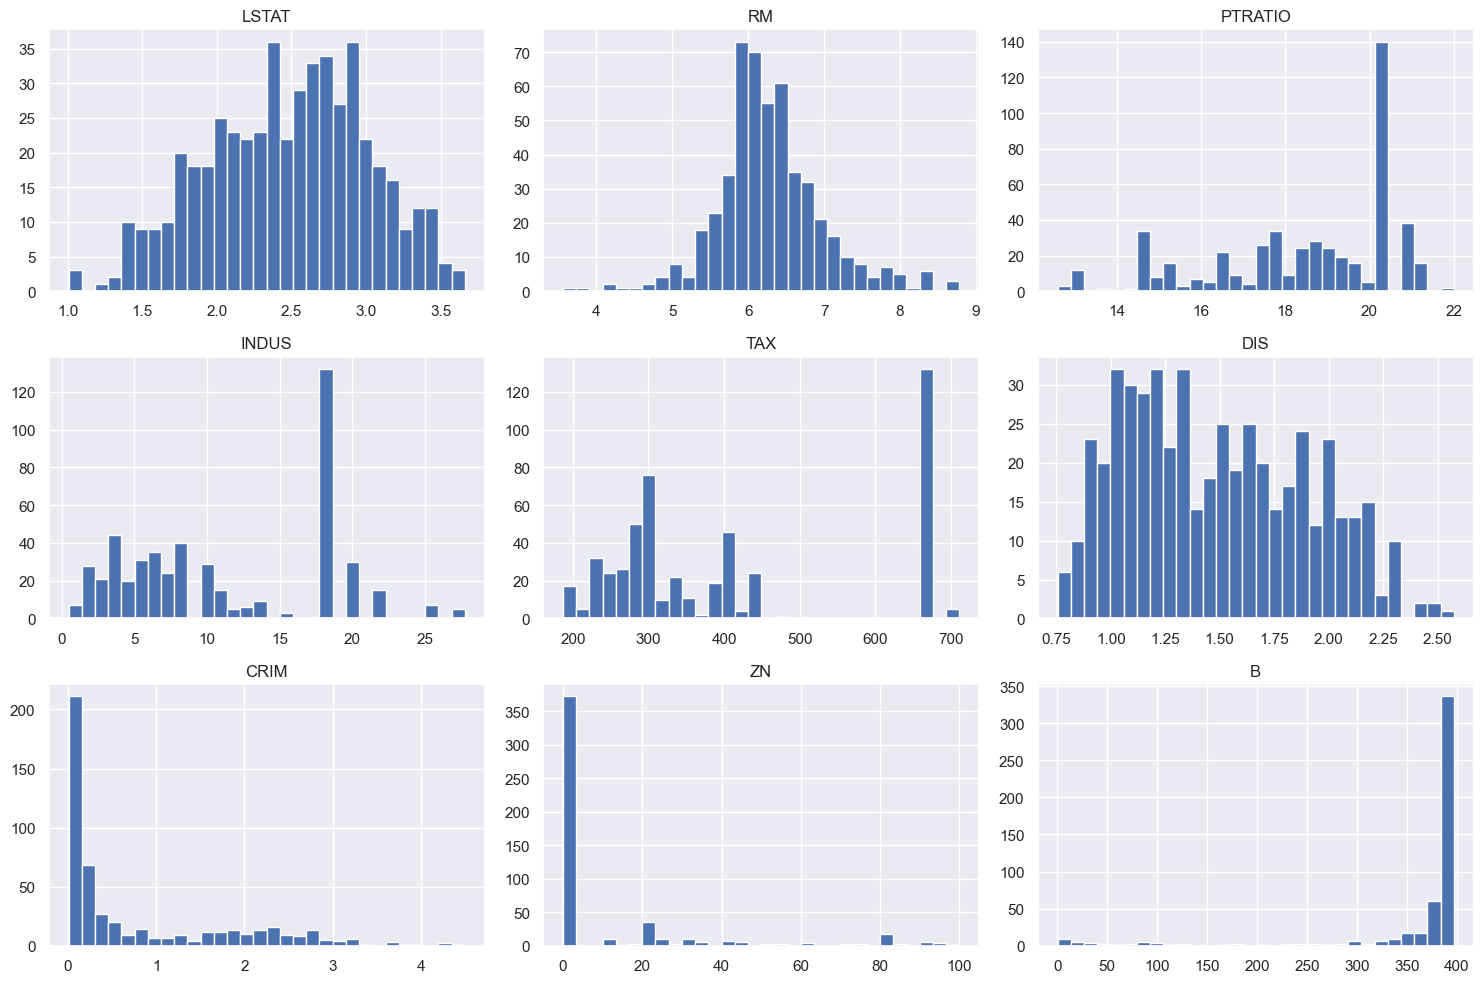

In [237]:
# Plot histograms of all features after transformation
# Let's visualize Histograms of Features After Transformation

print("\nHistograms of selected features after transformation:")

X.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Outliers

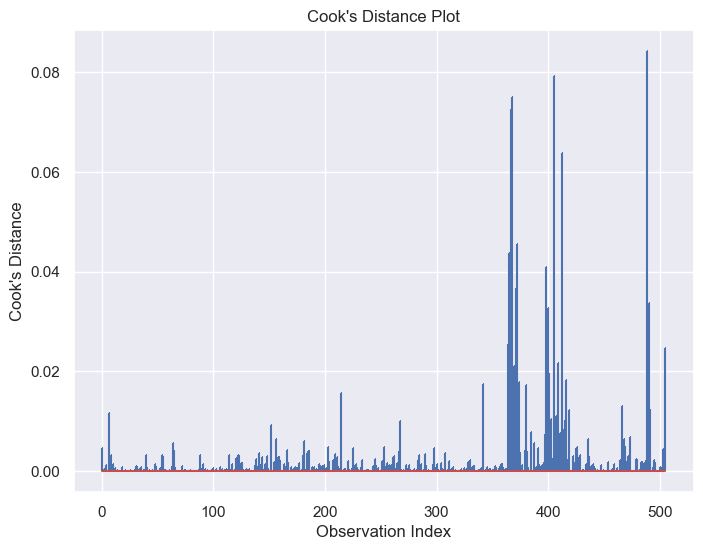

Number of influential points: 34


In [240]:
#Seems like we have outliers, we have to remove them. 

#Add a constant term for intercept
X_const = sm.add_constant(X)

# Fit the model using statsmodels
model_sm = sm.OLS(y_log, X_const).fit()

# Get influence measures
influence = model_sm.get_influence()
cooks = influence.cooks_distance[0]

# Plot Cook's Distance
plt.figure(figsize=(8, 6))
plt.stem(np.arange(len(cooks)), cooks, markerfmt=",")
plt.title("Cook's Distance Plot")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()

# Define threshold for Cook's Distance
n = X.shape[0]
threshold = 4 / n
influential_points = np.where(cooks > threshold)[0]
print(f"Number of influential points: {len(influential_points)}")

# Remove influential points
X_clean = X.drop(index=influential_points).reset_index(drop=True)
y_clean_log = y_log.drop(index=influential_points).reset_index(drop=True)

In [309]:
#Feature Scaling
# Scale the features
scaler = StandardScaler()
X_clean_scaled = scaler.fit_transform(X_clean)
X_clean

,LSTAT,RM,PTRATIO,INDUS,TAX,DIS,CRIM,ZN,B
0,1.788421,6.575,15.3,2.31,296.0,1.627278,0.006300,18.0,396.90
1,2.316488,6.421,17.8,7.07,242.0,1.786261,0.026944,0.0,396.90
2,1.615420,7.185,17.8,7.07,242.0,1.786261,0.026924,0.0,392.83
3,1.371181,6.998,18.7,2.18,222.0,1.954757,0.031857,0.0,394.63
4,1.845300,7.147,18.7,2.18,222.0,1.954757,0.066770,0.0,396.90
...,...,...,...,...,...,...,...,...,...
467,2.729812,6.027,19.2,9.69,391.0,1.252249,0.202435,0.0,396.90
468,2.367436,6.593,21.0,11.93,273.0,1.246630,0.060747,0.0,391.99
469,2.310553,6.120,21.0,11.93,273.0,1.190127,0.044275,0.0,396.90
470,1.893112,6.976,21.0,11.93,273.0,1.152943,0.058986,0.0,396.90


In [244]:
# Calculate VIF for each feature
#Rechecking Multicollinearity
vif = pd.DataFrame()
vif['Features'] = X.columns
X_scaled_vif = scaler.fit_transform(X_clean)
vif['VIF'] = [variance_inflation_factor(X_scaled_vif, i) for i in range(X_scaled_vif.shape[1])]
print("\nVariance Inflation Factors (VIF) after handling outliers:")
print(vif)

# If any VIF values are high (>5), consider removing or combining features


Variance Inflation Factors (VIF) after handling outliers:
  Features       VIF
0    LSTAT  3.429818
1       RM  2.289173
2  PTRATIO  1.553230
3    INDUS  3.356531
4      TAX  5.228403
5      DIS  3.357493
6     CRIM  5.542614
7       ZN  2.028650
8        B  1.434527


In [311]:
#Including Interaction Terms
# Convert scaled features back to DataFrame
X_clean_scaled_df = pd.DataFrame(X_clean_scaled, columns=X.columns)

# Create interaction terms
X_clean_scaled_df['RM_LSTAT'] = X_clean_scaled_df['RM'] * X_clean_scaled_df['LSTAT']
X_clean_scaled_df['DIS_INDUS'] = X_clean_scaled_df['DIS'] * X_clean_scaled_df['INDUS']

# Update feature list
updated_features = X.columns.tolist() + ['RM_LSTAT', 'DIS_INDUS']

# Update scaled features
X_final = X_clean_scaled_df
X_clean_scaled_df

,LSTAT,RM,PTRATIO,INDUS,TAX,DIS,CRIM,ZN,B,RM_LSTAT,DIS_INDUS
0,-1.267930,0.398048,-1.422053,-1.243536,-0.606743,0.287313,-0.762819,0.246028,0.421783,-0.504697,-0.357284
1,-0.259059,0.163916,-0.267344,-0.536823,-0.942035,0.682547,-0.740910,-0.506268,0.421783,-0.042464,-0.366407
2,-1.598447,1.325454,-0.267344,-0.536823,-0.942035,0.682547,-0.740931,-0.506268,0.374791,-2.118668,-0.366407
3,-2.065065,1.041151,0.148351,-1.262837,-1.066217,1.101428,-0.735696,-0.506268,0.395574,-2.150045,-1.390925
4,-1.159261,1.267681,0.148351,-1.262837,-1.066217,1.101428,-0.698644,-0.506268,0.421783,-1.469574,-1.390925
...,...,...,...,...,...,...,...,...,...,...,...
467,0.530595,-0.435097,0.379293,-0.147834,-0.016878,-0.645013,-0.554669,-0.506268,0.421783,-0.230860,0.095355
468,-0.161722,0.425414,1.210683,0.184737,-0.749552,-0.658981,-0.705036,-0.506268,0.365092,-0.068799,-0.121738
469,-0.270397,-0.293705,1.210683,0.184737,-0.749552,-0.799447,-0.722517,-0.506268,0.421783,0.079417,-0.147688
470,-1.067917,1.007704,1.210683,0.184737,-0.749552,-0.891889,-0.706906,-0.506268,0.421783,-1.076144,-0.164765


In [248]:
# Splitting the Data
# Split the dataset into training and testing sets
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X_final, y_clean_log, test_size=0.2, random_state=42)

# Model Implementation
## Linear REgression

In [313]:
# Instantiate and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train_log)

# Predict on test set
y_pred_log_lr = lr.predict(X_test)

# Convert predictions back to original scale
y_pred_lr = np.expm1(y_pred_log_lr)
y_test = np.expm1(y_test_log)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print("\nLinear Regression Performance on Test Set:")
print(f"MSE: {mse_lr:.2f}")
print(f"R-squared: {r2_lr:.4f}")


Linear Regression Performance on Test Set:
MSE: 8.75
R-squared: 0.8492


## Ridge Regression with Fine-Grained Hyperparameter Tuning



Best alpha for Ridge Regression: 8.508416833667335


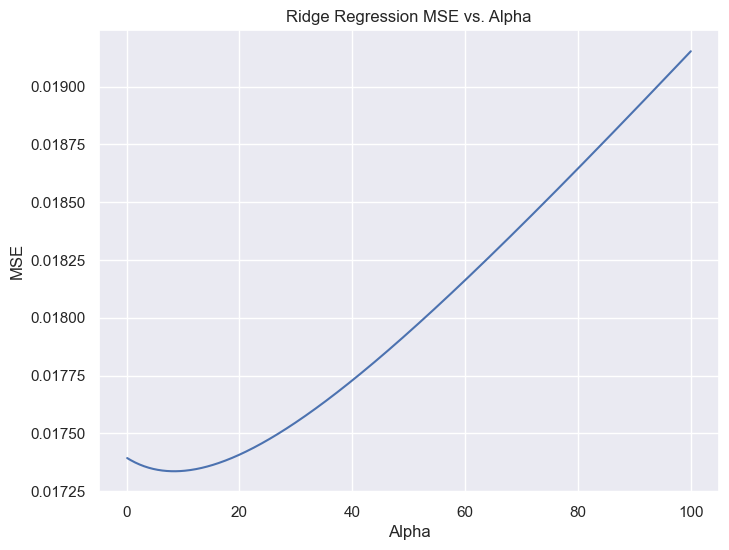

Ridge Regression Performance on Test Set:
MSE: 8.52
R-squared: 0.8532


In [315]:
# Define a fine-grained range of alpha values
alpha_values = np.linspace(0.1, 100, 500)

ridge_scores = []
ridge_models = []
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train_log)
    y_pred_log = ridge.predict(X_test)
    mse = mean_squared_error(y_test_log, y_pred_log)
    r2 = r2_score(y_test_log, y_pred_log)
    ridge_scores.append({'alpha': alpha, 'mse': mse, 'r2': r2})
    ridge_models.append(ridge)

# Convert the scores to a DataFrame
ridge_scores_df = pd.DataFrame(ridge_scores)

# Find the alpha with the lowest MSE
best_ridge = ridge_scores_df.loc[ridge_scores_df['mse'].idxmin()]
best_alpha_ridge = best_ridge['alpha']
print(f"\nBest alpha for Ridge Regression: {best_alpha_ridge}")

# Plot MSE vs. Alpha
plt.figure(figsize=(8, 6))
plt.plot(ridge_scores_df['alpha'], ridge_scores_df['mse'])
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Ridge Regression MSE vs. Alpha')
plt.show()

# Evaluate the best model
best_ridge_model = ridge_models[ridge_scores_df['mse'].idxmin()]
y_pred_log_ridge = best_ridge_model.predict(X_test)
y_pred_ridge = np.expm1(y_pred_log_ridge)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("Ridge Regression Performance on Test Set:")
print(f"MSE: {mse_ridge:.2f}")
print(f"R-squared: {r2_ridge:.4f}")

# Lasso Regression with Fine-Grained Hyperparameter Tuning



Best alpha for Lasso Regression: 0.004107615230460922


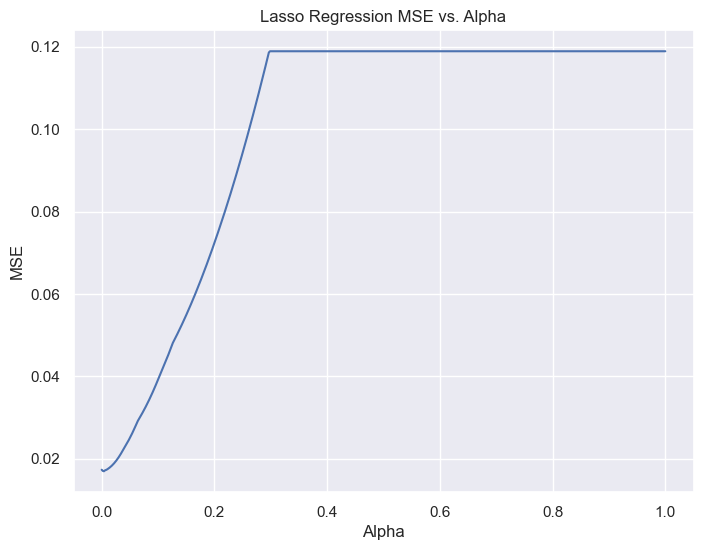

Lasso Regression Performance on Test Set:
MSE: 7.96
R-squared: 0.8629


In [317]:
# Define a fine-grained range of alpha values
alpha_values = np.linspace(0.0001, 1, 500)

lasso_scores = []
lasso_models = []
for alpha in alpha_values:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train_log)
    y_pred_log = lasso.predict(X_test)
    mse = mean_squared_error(y_test_log, y_pred_log)
    r2 = r2_score(y_test_log, y_pred_log)
    lasso_scores.append({'alpha': alpha, 'mse': mse, 'r2': r2})
    lasso_models.append(lasso)

# Convert the scores to a DataFrame
lasso_scores_df = pd.DataFrame(lasso_scores)

# Find the alpha with the lowest MSE
best_lasso = lasso_scores_df.loc[lasso_scores_df['mse'].idxmin()]
best_alpha_lasso = best_lasso['alpha']
print(f"\nBest alpha for Lasso Regression: {best_alpha_lasso}")

# Plot MSE vs. Alpha
plt.figure(figsize=(8, 6))
plt.plot(lasso_scores_df['alpha'], lasso_scores_df['mse'])
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Lasso Regression MSE vs. Alpha')
plt.show()

# Evaluate the best model
best_lasso_model = lasso_models[lasso_scores_df['mse'].idxmin()]
y_pred_log_lasso = best_lasso_model.predict(X_test)
y_pred_lasso = np.expm1(y_pred_log_lasso)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print("Lasso Regression Performance on Test Set:")
print(f"MSE: {mse_lasso:.2f}")
print(f"R-squared: {r2_lasso:.4f}")

# Elastic Net Regression with Fine-Grained Hyperparameter Tuning


In [319]:
from sklearn.linear_model import ElasticNet

# Define a range of alpha and l1_ratio values
alpha_values = np.linspace(0.0001, 1, 100)
l1_ratio_values = np.linspace(0.1, 0.9, 9)

en_scores = []
en_models = []

for l1_ratio in l1_ratio_values:
    for alpha in alpha_values:
        en = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        en.fit(X_train, y_train_log)
        y_pred_log = en.predict(X_test)
        mse = mean_squared_error(y_test_log, y_pred_log)
        r2 = r2_score(y_test_log, y_pred_log)
        en_scores.append({'alpha': alpha, 'l1_ratio': l1_ratio, 'mse': mse, 'r2': r2})
        en_models.append(en)

# Convert the scores to a DataFrame
en_scores_df = pd.DataFrame(en_scores)

# Find the combination with the lowest MSE
best_en = en_scores_df.loc[en_scores_df['mse'].idxmin()]
best_alpha_en = best_en['alpha']
best_l1_ratio_en = best_en['l1_ratio']
print(f"\nBest alpha for Elastic Net: {best_alpha_en}")
print(f"Best l1_ratio for Elastic Net: {best_l1_ratio_en}")

# Evaluate the best model
best_en_model = en_models[en_scores_df['mse'].idxmin()]
y_pred_log_en = best_en_model.predict(X_test)
y_pred_en = np.expm1(y_pred_log_en)

mse_en = mean_squared_error(y_test, y_pred_en)
r2_en = r2_score(y_test, y_pred_en)
rmse_en = np.sqrt(mse_en)

print("Elastic Net Regression Performance on Test Set:")
print(f"MSE: {mse_en:.2f}")
print(f"R-squared: {r2_en:.4f}")


Best alpha for Elastic Net: 0.010199999999999999
Best l1_ratio for Elastic Net: 0.4
Elastic Net Regression Performance on Test Set:
MSE: 7.95
R-squared: 0.8630


# Model Evaluation to check the Performances

## Comparing the Models

In [321]:
# Compare models
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net'],
    'MSE': [mse_lr, mse_ridge, mse_lasso, mse_en],
    'R-squared': [r2_lr, r2_ridge, r2_lasso, r2_en]
})

print("\nModel Performance Comparison:")
print(model_comparison)


Model Performance Comparison:
               Model       MSE  R-squared
0  Linear Regression  8.750637   0.849233
1   Ridge Regression  8.522186   0.853169
2   Lasso Regression  7.958080   0.862888
3        Elastic Net  7.950106   0.863026


## Visualizing Predicted vs. Actual Values


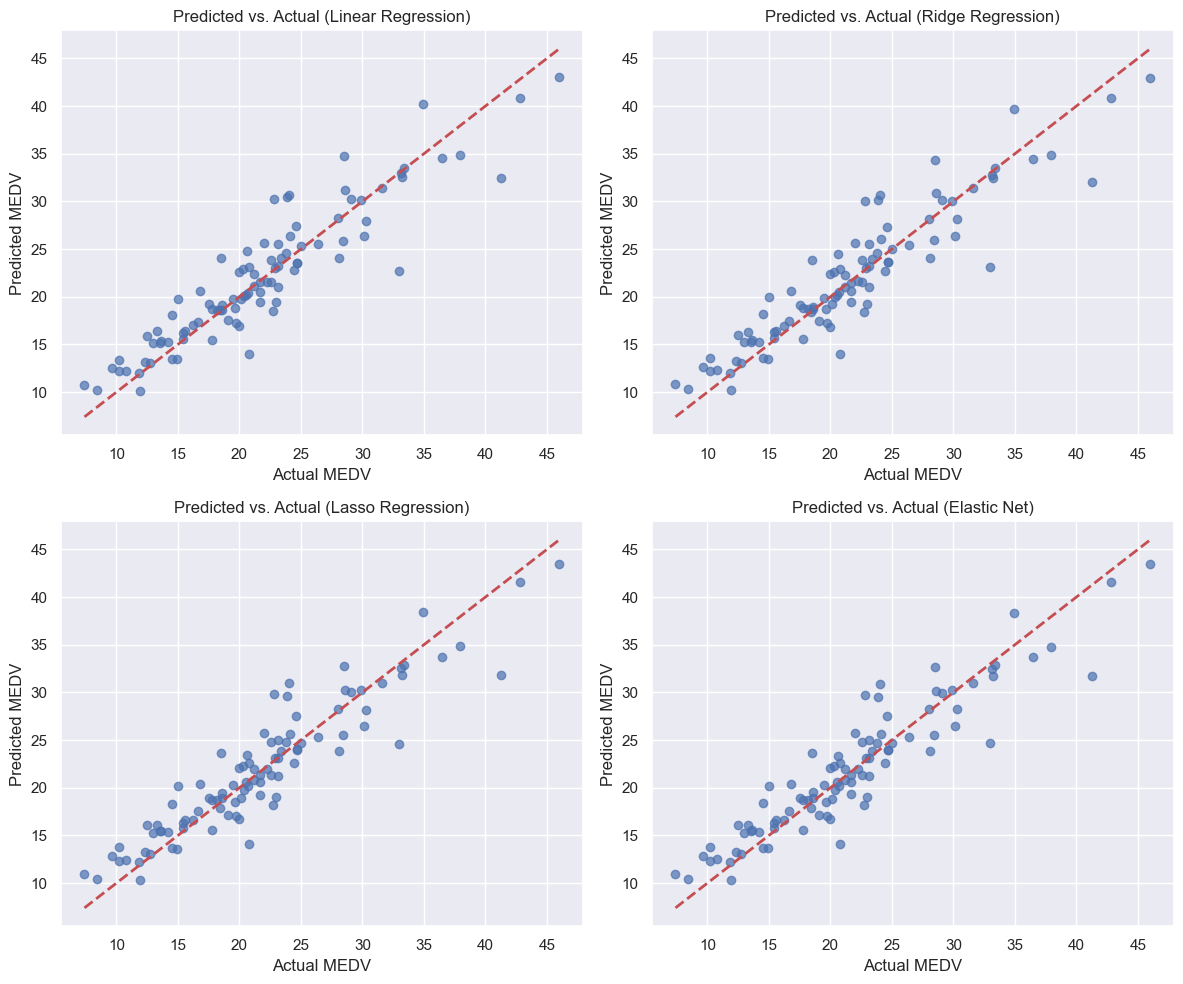

In [325]:
# Store predictions in a dictionary
models_predictions = {
    'Linear Regression': y_pred_lr,
    'Ridge Regression': y_pred_ridge,
    'Lasso Regression': y_pred_lasso,
    'Elastic Net': y_pred_en
}

# Plot Predicted vs. Actual Values for Each Model
plt.figure(figsize=(12, 10))  # Adjust figure size for 2x2 grid

for i, (model_name, y_pred_model) in enumerate(models_predictions.items()):
    plt.subplot(2, 2, i+1)  # 2 rows, 2 columns
    plt.scatter(y_test, y_pred_model, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.xlabel('Actual MEDV')
    plt.ylabel('Predicted MEDV')
    plt.title(f'Predicted vs. Actual ({model_name})')

plt.tight_layout()
plt.show()

## Residual Analysis


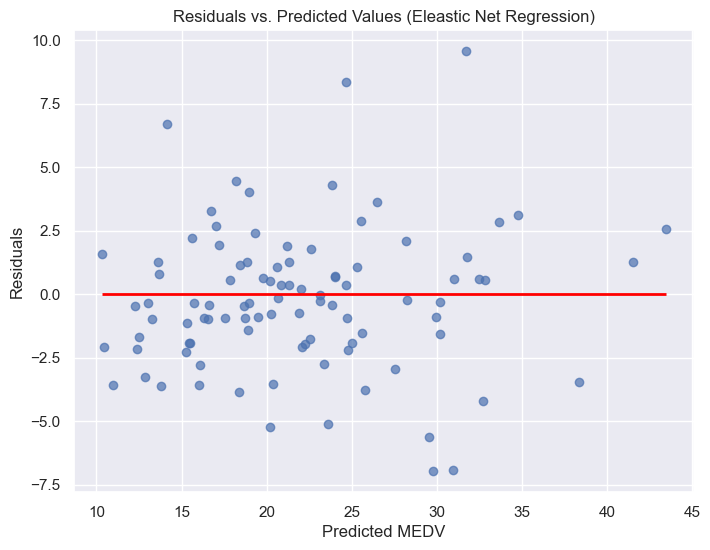

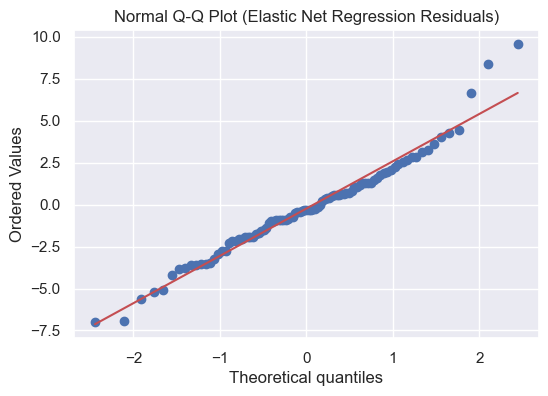

In [327]:
# Residuals for the best model(Elastic Net)
residuals = y_test - y_pred_en

# Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_en, residuals, alpha=0.7)
plt.hlines(y=0, xmin=y_pred_en.min(), xmax=y_pred_en.max(), colors='red', linewidth=2)
plt.xlabel('Predicted MEDV')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Eleastic Net Regression)')
plt.show()

# Q-Q Plot for residuals
import scipy.stats as stats

plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot (Elastic Net Regression Residuals)')
plt.show()

## Cross-Validation


In [329]:
# Cross-validation for Elastic Net Regression using best alpha and l1_ratio
en_cv_model = ElasticNet(alpha=best_alpha_en, l1_ratio=best_l1_ratio_en, max_iter=10000)
cv_scores = cross_val_score(en_cv_model, X_final, y_clean_log, cv=5, scoring='neg_mean_squared_error')

print("\nCross-Validation MSE Scores (Elastic Net Regression):")
print(-cv_scores)
print(f"Average CV MSE: {-cv_scores.mean():.4f}")


Cross-Validation MSE Scores (Elastic Net Regression):
[0.01304716 0.01663716 0.01227872 0.01882286 0.03282283]
Average CV MSE: 0.0187


## Interpretation of Coefficients



Elastic Net Regression Model Coefficients:
LSTAT       -0.137073
CRIM        -0.075335
PTRATIO     -0.047684
RM_LSTAT    -0.024098
DIS         -0.014190
TAX         -0.000000
ZN           0.000398
INDUS        0.007758
DIS_INDUS    0.039076
B            0.041348
RM           0.104218
dtype: float64


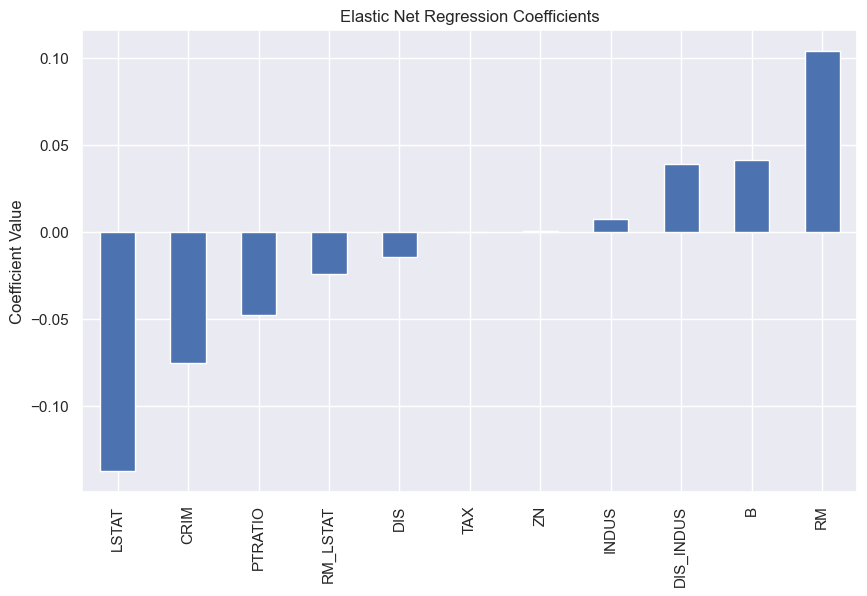

In [331]:
# Coefficients of the best Elastic Net Regression model
coefficients = pd.Series(best_en_model.coef_, index=X_final.columns)
print("\nElastic Net Regression Model Coefficients:")
print(coefficients.sort_values())

# Plot the coefficients
plt.figure(figsize=(10, 6))
coefficients.sort_values().plot(kind='bar')
plt.title('Elastic Net Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.show()

# Quick Notes
#### Well, that was a thrilling dataset! I am not really sure why they reall added that very suspicious column, which is 'B'. 
#### Maybe people back then was really that racists to our black brothers. WElp, gotta love life!